 ## Lectura del conjunto de datos

In [1]:
from sklearn.datasets import load_iris

In [2]:
# Cargamos el conjunto de datos
iris_dataset = load_iris()

In [5]:
# Visualizamos las etiquetas del conjunto de datos
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# Leemos el conjunto de datos con la libreria Pandas
import pandas as pd
import numpy as np

df = pd.DataFrame(np.c_[iris_dataset['data'], iris_dataset['target']], columns= iris_dataset['feature_names'] + ['target'])

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## Visualizacion del conjunto de datos

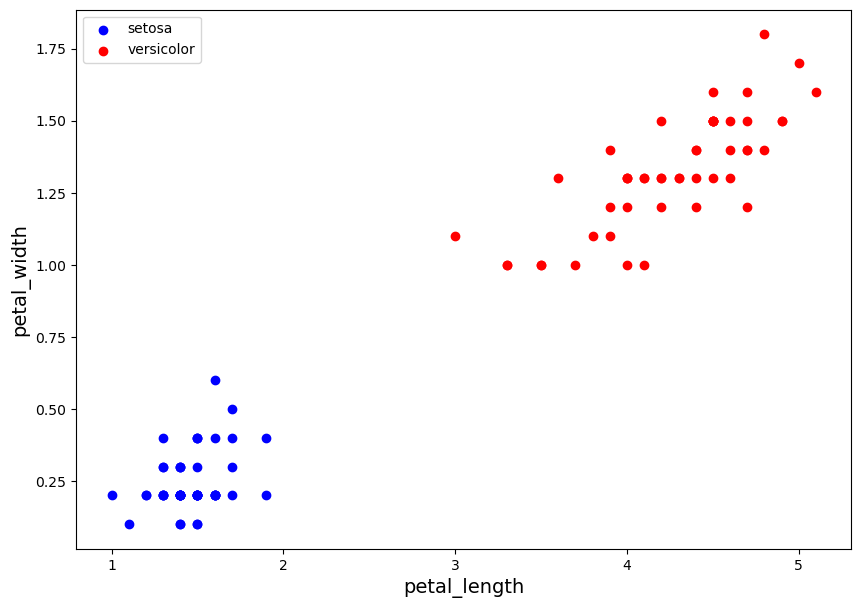

In [13]:
# Representacion grafica de dos dimensiones del conjunto de datos
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))

plt.scatter(df["petal length (cm)"][df["target"] == 0], 
           df["petal width (cm)"][df["target"] == 0], c="b", label="setosa")

plt.scatter(df["petal length (cm)"][df["target"] == 1], 
           df["petal width (cm)"][df["target"] == 1], c="r", label="versicolor")

plt.xlabel("petal_length", fontsize=14)
plt.ylabel("petal_width", fontsize=14)
plt.legend()

plt.show()



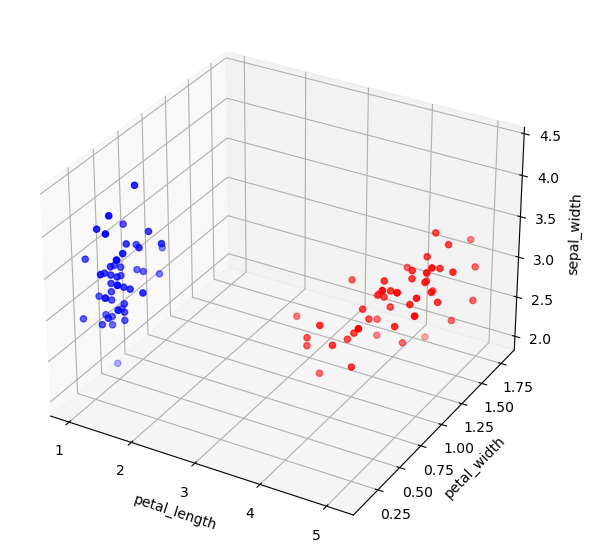

In [15]:
# Representacion grafica de tres dimennsiones del conjunto de datos de 2 clases de iris
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection="3d")

ax.scatter3D(df["petal length (cm)"][df["target"] == 0], 
             df["petal width (cm)"][df["target"] == 0], 
             df["sepal width (cm)"][df["target"] == 0], c="b")

ax.scatter3D(df["petal length (cm)"][df["target"] == 1], 
             df["petal width (cm)"][df["target"] == 1], 
             df["sepal width (cm)"][df["target"] == 1], c="r")


ax.set_xlabel("petal_length")
ax.set_ylabel("petal_width")
ax.set_zlabel("sepal_width")

plt.show()

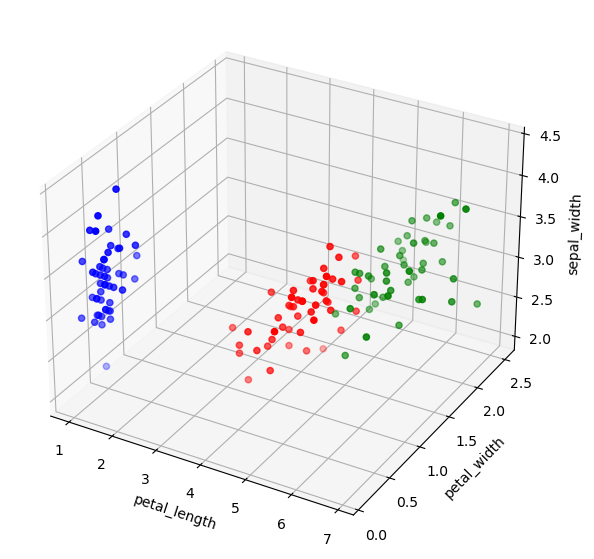

In [16]:
# Representacion grafica de tres dimennsiones del conjunto de datos de 3 clases de iris
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection="3d")

ax.scatter3D(df["petal length (cm)"][df["target"] == 0], 
             df["petal width (cm)"][df["target"] == 0], 
             df["sepal width (cm)"][df["target"] == 0], c="b")

ax.scatter3D(df["petal length (cm)"][df["target"] == 1], 
             df["petal width (cm)"][df["target"] == 1], 
             df["sepal width (cm)"][df["target"] == 1], c="r")

ax.scatter3D(df["petal length (cm)"][df["target"] == 2], 
             df["petal width (cm)"][df["target"] == 2], 
             df["sepal width (cm)"][df["target"] == 2], c="g")


ax.set_xlabel("petal_length")
ax.set_ylabel("petal_width")
ax.set_zlabel("sepal_width")

plt.show()

## Entrenamiento del algoritmo

In [17]:
# Reducimos el conjunto de datos para entrenar el algoritmo 
df_reduced = df[["petal length (cm)", "petal width (cm)", "target"]]
df_reduced = df_reduced.loc[df_reduced["target"].isin([0,1])]
df_reduced

,petal length (cm),petal width (cm),target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0
...,...,...,...
95,4.2,1.2,1.0
96,4.2,1.3,1.0
97,4.3,1.3,1.0
98,3.0,1.1,1.0


In [20]:
# Separamos las etiquetas de salida del resto de caracteristicas del conjunto de datos
X_df = df_reduced[["petal length (cm)", "petal width (cm)"]]
y_df = df_reduced["target"]

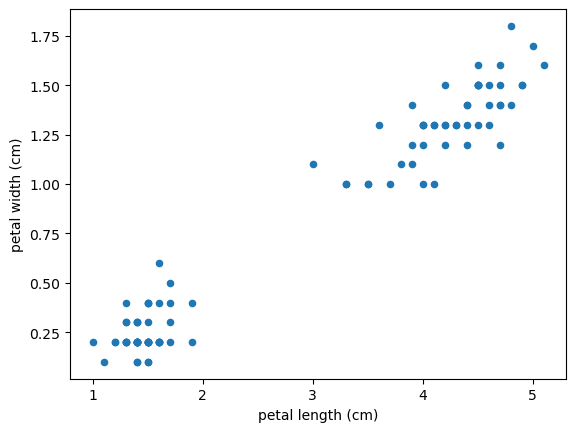

In [21]:
# Visualizamos el conjunto de datos de entrenamiento reducido
X_df.plot.scatter("petal length (cm)", "petal width (cm)")
plt.show()

In [22]:
from sklearn.linear_model import Perceptron

clf = Perceptron(max_iter=1000, random_state=40)
clf.fit(X_df, y_df)

Perceptron(random_state=40)

## Visualizacion del limite de decision construido por el algoritmo

In [24]:
# z(x) = x1*w1 + x2*w2 + b = x1*0.9 + x2*1.3 + (-3)

In [25]:
# Parametros del modelo 
clf.coef_

array([[0.9, 1.3]])

In [26]:
# Termino de interceptacion (bias term)
clf.intercept_

array([-3.])

C:\Users\username\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


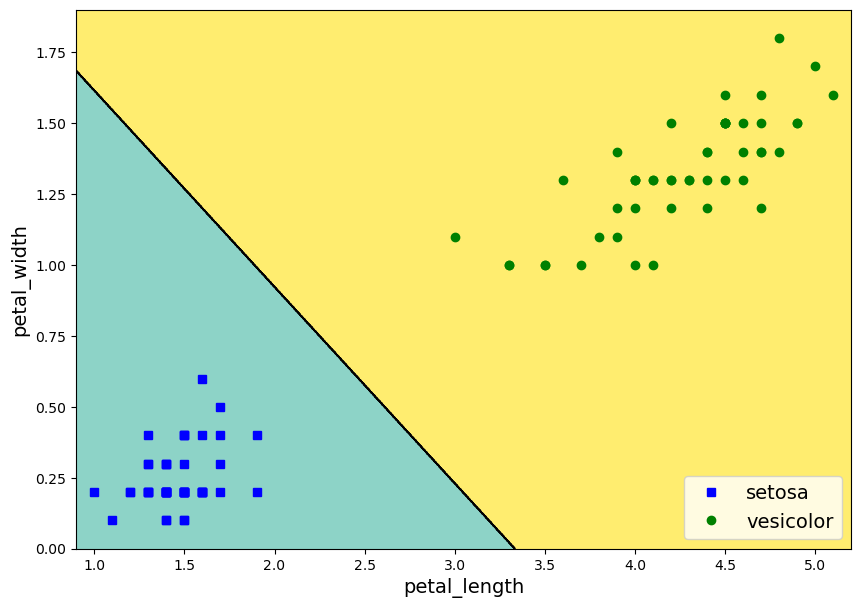

In [35]:
# Representacion grafica del limite de decision
import numpy as np

X = X_df.values

mins = X.min(axis=0) - 0.1
maxs = X.max(axis=0) + 0.1

xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000), 
                    np.linspace(mins[1], maxs[1], 1000))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(10,7))

plt.contourf(xx, yy, Z, cmap="Set3")
plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
            
plt.plot(X[:, 0][y_df==0], X[:, 1][y_df==0], 'bs', label="setosa")
plt.plot(X[:, 0][y_df==1], X[:, 1][y_df==1], 'go', label="vesicolor")

plt.xlabel("petal_length", fontsize=14)
plt.ylabel("petal_width", fontsize=14)        
plt.legend(loc="lower right", fontsize=14)

plt.show()